<a href="https://colab.research.google.com/github/chimaek/kaggle/blob/master/titanic_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 미션!!!!

*   김 승주
*   허 지식
*   강 용재
*   박 다은


## 사전 준비(라이브러리 추가 및 캐글 데이터 다운로드)

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"chimaek","key":"309f875c059cb8a4f4a380cee24f1941"}'}

In [0]:
!mkdir -p ~/.kaggle
# 드라이브 내 파일 생성
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c 2019-1st-ml-month-with-kakr
# 캐글 competition에서 파일을 가져오는 명령

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import numpy as np
# 행렬 연산 라이브러리

import pandas as pd
# 데이터 프레임 라이브러리

import matplotlib.pyplot as plt
%matplotlib inline
# 시각화(그래프) 라이브러리

import seaborn as sns
# 시각화(그래프) 라이브러리

import warnings
warnings.filterwarnings('ignore')
# 비추천 경고 무시

import re
# 정규화에 도움을 주는 라이브러리

# 그래프 설정
plt.rcParams['figure.figsize'] = (16,9)
sns.set_palette('gist_earth')

import missingno as msno
# Null 값을 쉽게 시각화 해주는 라이브러리

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
# 모델 생성을 위한 알고리즘


In [0]:
train=pd.read_csv("train.csv")
# 생존값이 있는 연습용 데이터를 읽어온다.(판다스 데이터프레임 형태)
test=pd.read_csv("test.csv")
# 생존값을 예측하고자하는 테스트 데이터를 읽어온다.(판다스 데이터프레임 형태)

data = pd.concat([train, test], ignore_index = True)
# 연습용 데이터와 테스트데이터를 합쳐 새로운 데이터 프레임 만들기

## 데이터 분석

### 데이터 확인 

In [0]:
train.head()
# 위에서 5개의 행을 보여준다.


# train.tail()
# 아래에서 5개의 행을 보여준다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


데이터 필드
* survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
* pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
* sex - 성별
* Age - 나이(세)
* sibsp - 함께 탑승한 형제자매, 배우자 수 총합
* parch - 함께 탑승한 부모, 자녀 수 총합
* ticket - 티켓 넘버
* fare - 탑승 요금
* cabin - 객실 넘버
* embarked - 탑승 항구

In [0]:
train.describe()
# 문자열을 제외한 분포도(갯수, 평균값, 최대값, 최소값 등)를 보여줌.


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** 추론할 수 있는 결론:  총 891명의 사람이 있지만 Age피쳐의 데이터중 빈 값이 있다는 것을 알 수 있음. **

### NULL값 검색

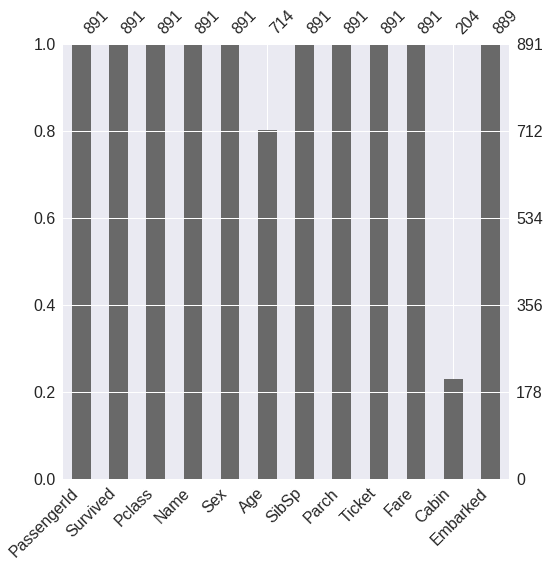

In [0]:
msno.bar(df=train.iloc[:, :], figsize=(8, 8))

# 데이터의 행과 열을 모두 가져온후에 바 그래프 형태로 시각화 하여 보여줌.


** 추론 할 수있는 결론 : Age , Cabin(데이터가 많이 부족) ,Embarked피쳐의 값이 비었다는 것을 알 수 있다. **

### 예측 하고자하는 (Label 이라고도함) Survived의 데이터를 확인

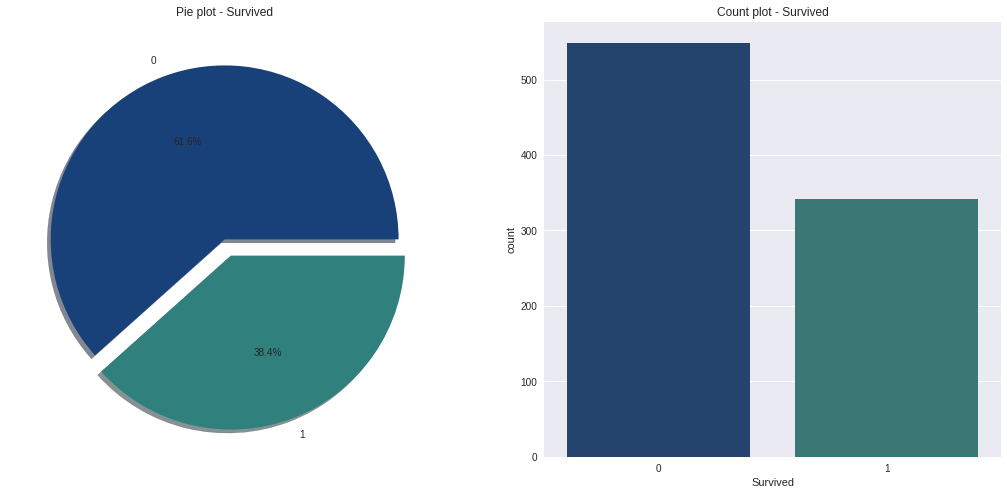

In [0]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# 1행 2열의 형태로 파레트를 만든다.

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# Pie(원형 형태로 시각화)하되 explode(0과 1값 사이의 간격을 떨어뜨림) autopct(숫자형태로 지정.) ax =(이 그래프를 파레트의 어디에 위치시킬건지) shadow(그림자)

ax[0].set_title('Pie plot - Survived')
# 첫 번째 그래프의 제목 지정

ax[0].set_ylabel('')
# 첫 번째 그래프의 y축 라벨 보이지 않게 함

sns.countplot('Survived', data=train, ax=ax[1])
# 0과 1값의 갯수를 센 그래프를 시각화 

ax[1].set_title('Count plot - Survived')
# 두 번째 그래프의 제목 지정

plt.show()
# 그래프 출력

** 추론 할 수 있는 결론: 죽지 않은 사람 38.4%와 죽은 사람 61.6%로 죽은 사람이 더 많다는것을 알 수 있다.**

### Pclass 분석

In [0]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True)
# Pclass와 Survived의 데이터를 합쳐 데이터프레임형태로 출력

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


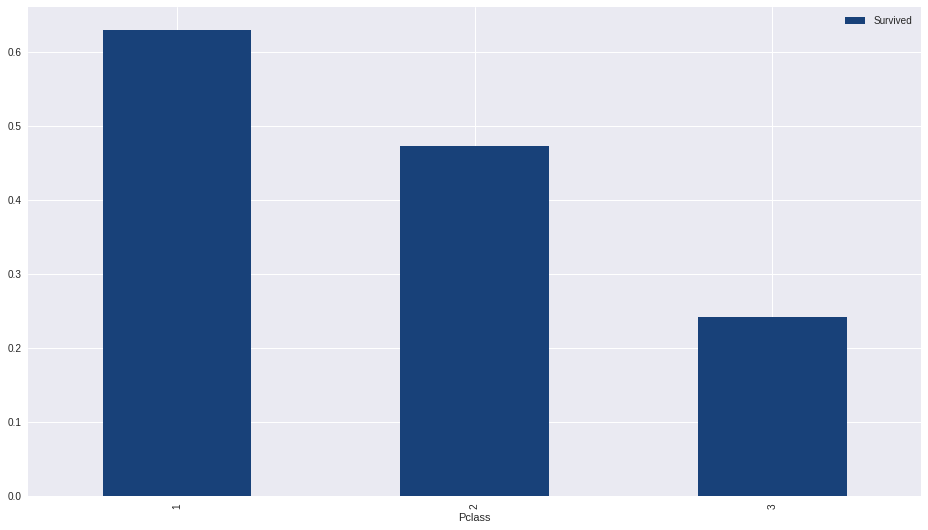

In [0]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
# Pclass, Survived를 Pclass 기준으로 묶어 평균값(mean)을 만들고 Survived를 기준으로 내림차순 한 후 바 형태의 그래프로 보여준다.

** 추론 할 수 있는 결론 : 1등석 쪽으로 갈 수록 생존 확률이 높다는것을 알 수 있다. ** 

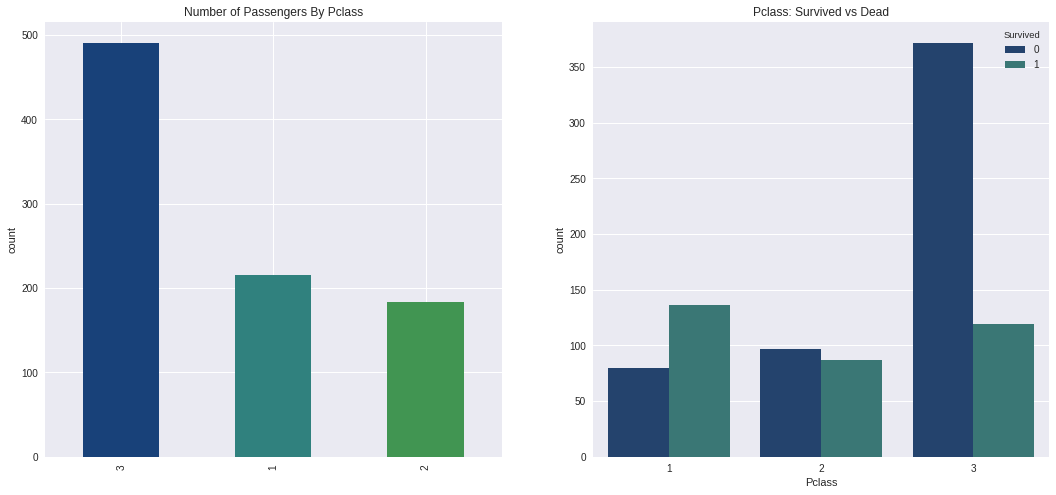

In [0]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# 파레트 설정

train['Pclass'].value_counts().plot.bar( ax=ax[0])
# Pclass의 값들을 바 형태로 설정

ax[0].set_title('Number of Passengers By Pclass')
# 첫 번째 그래프 제목 설정

ax[0].set_ylabel('count')
# 첫 번째 그래프 y축 라벨 설정

sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
# 두 번째 

ax[1].set_title('Pclass: Survived vs Dead')
# 두 번째 그래프 제목 설정

plt.show()
# 그래프 출력


In [0]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 두 피쳐를 를 Pclass피쳐로 묶어 평균값을 내림차순 형태로 보여준다.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


** 추론 할 수 있는 결론 : Pclass는 생존확률에 많은 영향을 끼친다. **

### Sex 분석

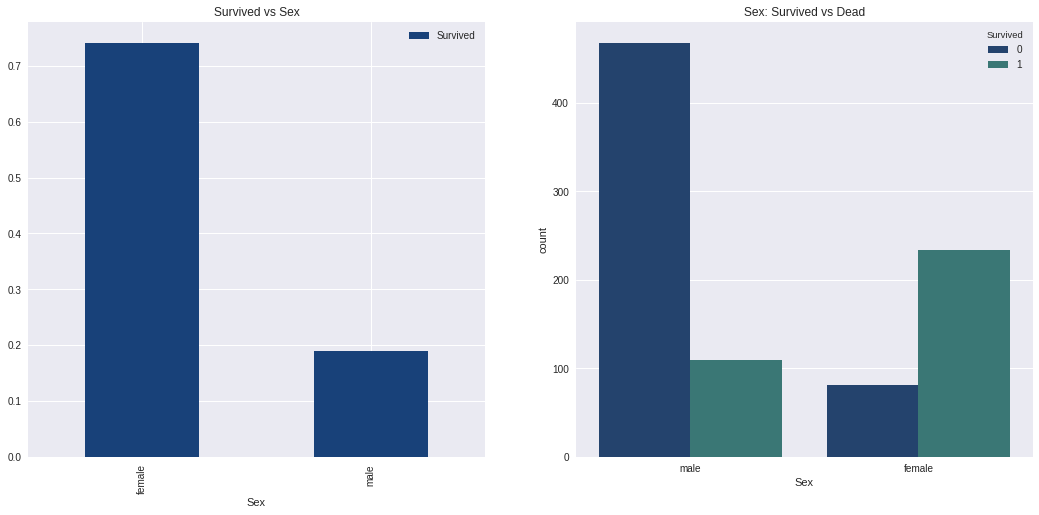

In [0]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# 파레트 설정

train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
# Sex와 Survived를 Sex로 묶어 평균값을 취한후 보여줌.

ax[0].set_title('Survived vs Sex')
# 첫 번째 그래프 제목 설정

sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
# Sex를 hue 값을 Survived를 준 후 그래프형태로 보여줌.

ax[1].set_title('Sex: Survived vs Dead')
# 두 번째 그래프의 제목 설정

plt.show()
# 그래프 출력

In [0]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 두 피쳐를 를 Sex피쳐로 묶어 평균값을 내림차순 형태로 보여준다.

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [0]:
pd.crosstab(train['Sex'], train['Survived'], margins=True)
# 두 피쳐를 데이터 프레임 형태로 보여줌.

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


** 추론 할 수 있는 결론 : 여성 일 수록 생존 확률이 높다는것을 알 수 있다. ** 

### Pclass + Sex 의 생존 분석


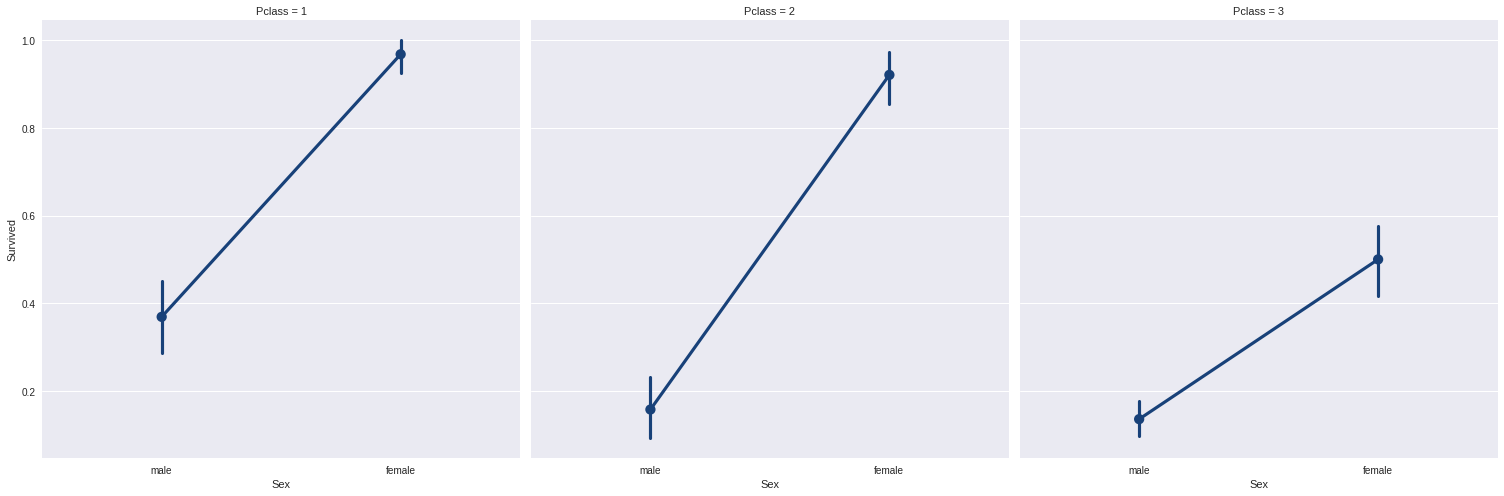

In [0]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',data=train, size=7)
# x축과 y축을 설정한후에 Pclass를 기준으로 그래프를 그려준다.

** 추론 할 수 있는 결론 : 모든 클래스에서 여성이 살 확률이 남자 보다 높다. 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높다. **

### Age 분석

In [0]:
print('제일 나이 많은 승객 : {:.1f} Years'.format(train['Age'].max()))
print('제일 어린 승객 : {:.1f} Years'.format(train['Age'].min()))
print('승객 평균 나이 : {:.1f} Years'.format(train['Age'].mean()))

제일 나이 많은 승객 : 80.0 Years
제일 어린 승객 : 0.4 Years
승객 평균 나이 : 29.7 Years


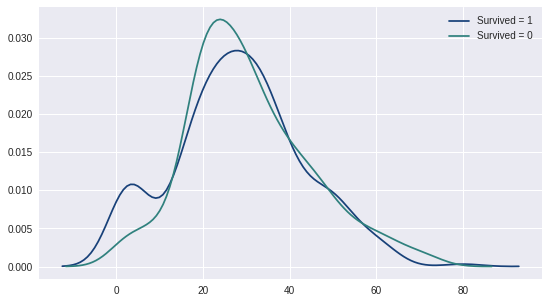

In [0]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))
# 파레트 설정

sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
# 산 사람의 그래프를 그려줌

sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
# 죽은 사람의 그래프를 그려줌

plt.legend(['Survived = 1', 'Survived = 0'])

# 범주 보여줌

plt.show()

# 그래프 보여주기

** 추론 할 수 있는 결론 : 나이가 적을 수록 생존 확률이 높다는것을 알 수 있다. **

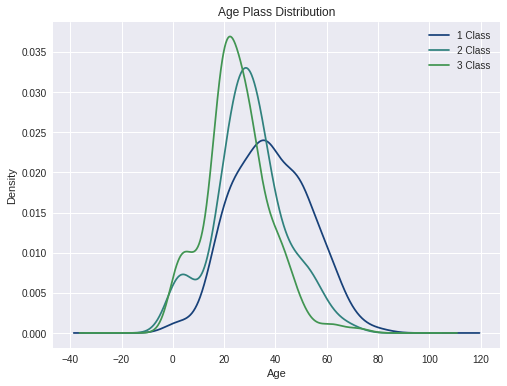

In [0]:
plt.figure(figsize=(8, 6))
# 파레트 설정

train['Age'][train['Pclass'] == 1].plot(kind='kde')
# 1등석의 나이를 그림

train['Age'][train['Pclass'] == 2].plot(kind='kde')
# 2등석의 나이를 그림

train['Age'][train['Pclass'] == 3].plot(kind='kde')
# 3등석의 나이를 그림

plt.xlabel('Age')
# x범주의 제목 설정

plt.title('Age Plass Distribution')
# 그래프의 제목 설정

plt.legend(['1 Class', '2 Class', '3 Class'])
# 범주 이름 설정

** 추론 할 수 있는 결론 : 나이가 많을 수록1등석이 많다는것을 알 수 있다. **

### Pclass + Sex + Age  분석

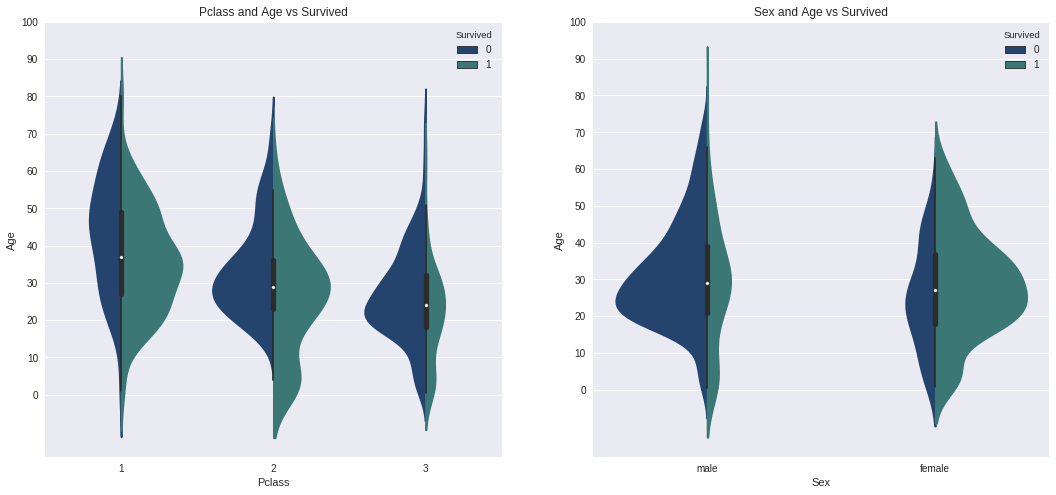

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# 파레트 설정 1행 2열

sns.violinplot("Pclass","Age", hue="Survived", data=train, scale='count', split=True,ax=ax[0])
# 3개의 피쳐의 개수들을 Survived값으로 보여줌.

ax[0].set_title('Pclass and Age vs Survived')
# 첫번째 그래프 제목 설정

ax[0].set_yticks(range(0,110,10))
# y축의 범위를 설정 0부터 110 까지 10단위로.

sns.violinplot("Sex","Age", hue="Survived", data=train, scale='count', split=True,ax=ax[1])
# 3개의 피쳐의 갯수들을 Survived값으로 보여줌.

ax[1].set_title('Sex and Age vs Survived')
# 두 번째 그래프 제목 설정

ax[1].set_yticks(range(0,110,10))
# y축의 범위를 0부터 110까지 10단위로.

plt.show()
# 그래프 출력

** 추론 할 수있는 결론 : 왼쪽 그래프에서는 나이가 어릴 수록 살 확률이 높았고 오른쪽 그래프에서는 여성이 생존 확률이 높다는것을 알 수 있다. **

### Name 분석




In [0]:
train['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

** 추론 할 수 있는 결론 :  정규화를 통해 다른 피쳐를 만들어 Miss , Mr 등 타이틀을 직접 설정해줘야함 **

### Embarked 분석

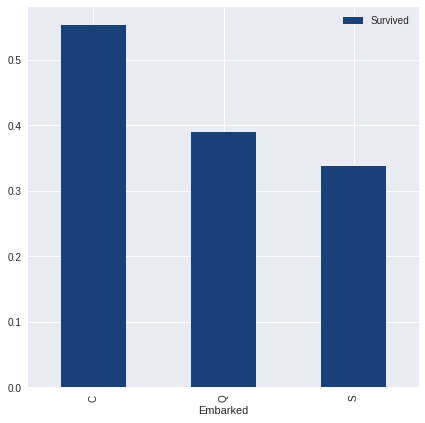

In [0]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

** 추론 할 수 있는 결론 : 생존률은 C가 높다 **

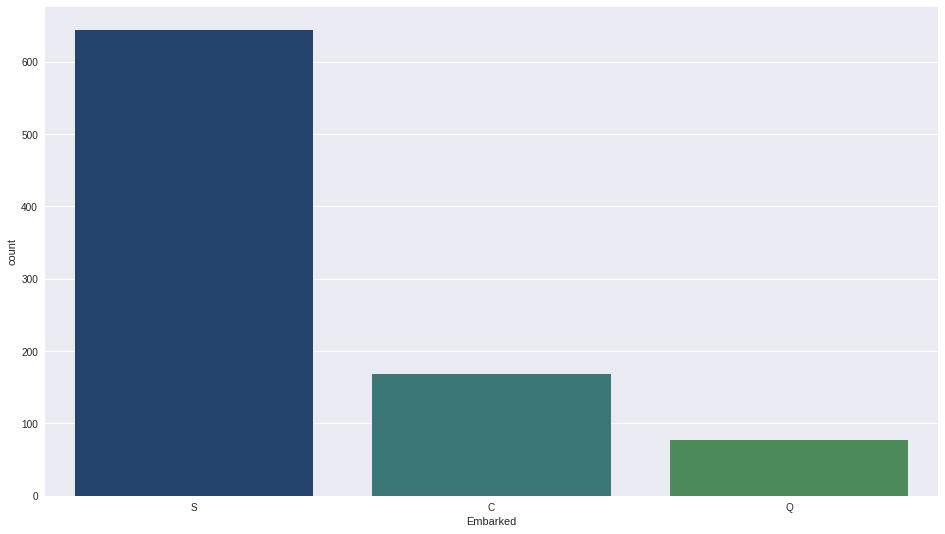

In [0]:
sns.countplot('Embarked', data=train)


** 추론 할 수 있는 결론 : S에서 많은 사람이 탔다 **






### SibSp 분석

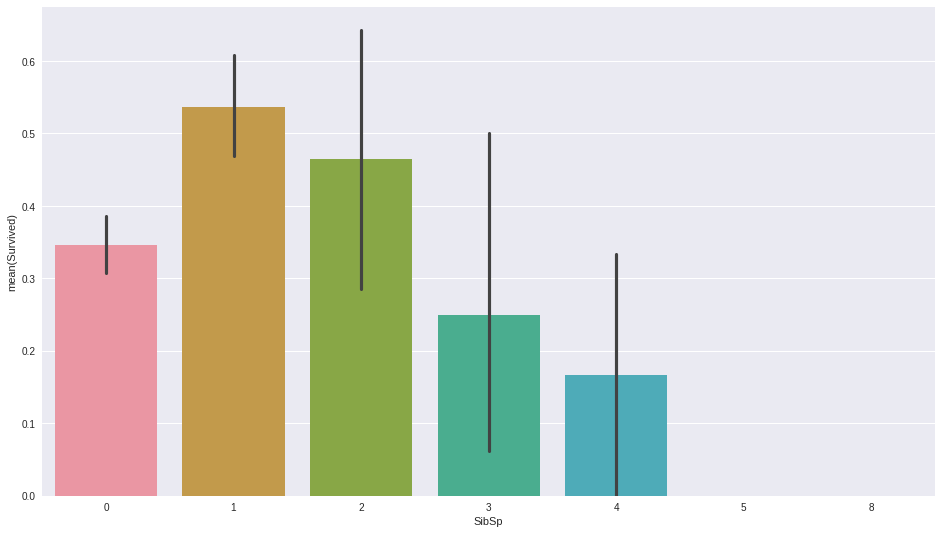

In [0]:
sns.barplot(x="SibSp", y="Survived", data=train)

**추론 할 수 있는 결론 : 형제자매와 배우자가 1명이나 2명이 생존확률이 높았다.  **

### Parch 분석

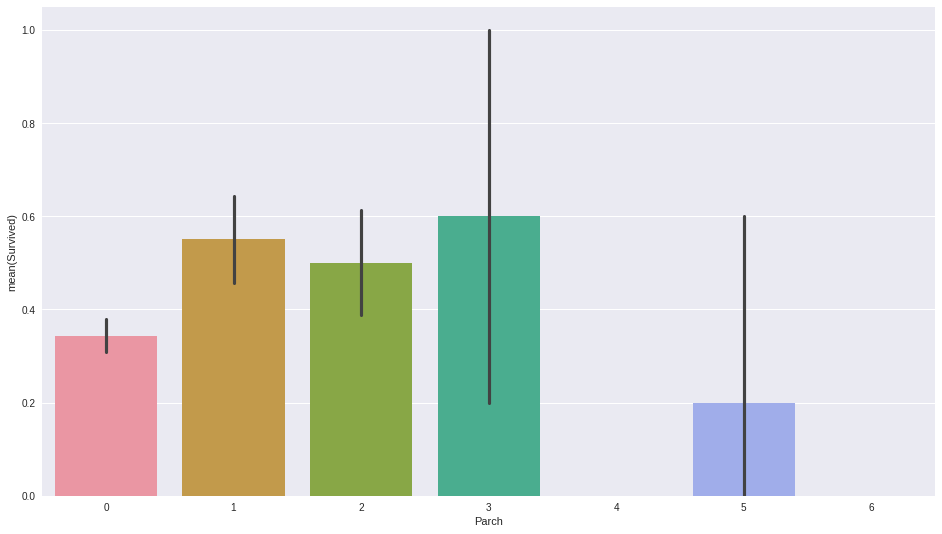

In [0]:
sns.barplot(x="Parch", y="Survived", data=train)

** 추론 할 수 있는 결론 : 딱히 없다고 할 수 있다. ** 

### Fare 분석

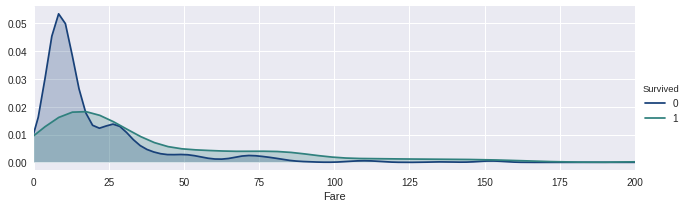

In [0]:
fare = sns.FacetGrid(train, hue="Survived",aspect=3)
fare.map(sns.kdeplot,'Fare',shade= True)
fare.set(xlim=(0, 200))
fare.add_legend()

** 추론 할 수 있는 결론 : 비교적 높은 요금을 지불한 승객은 높은 생존율을 보였다. **

## 데이터 가공

! 연습용 데이터와 테스트데이터를 합친 data를 가지고 활용 !

### Title 피쳐 생성

승객 이름을 통해 타이틀을 설정하는 단계 ':총 6가지로 분류함.


*   Officer
*   Royal
*   Mrs
*   Miss 
*   Mr 
*   Master




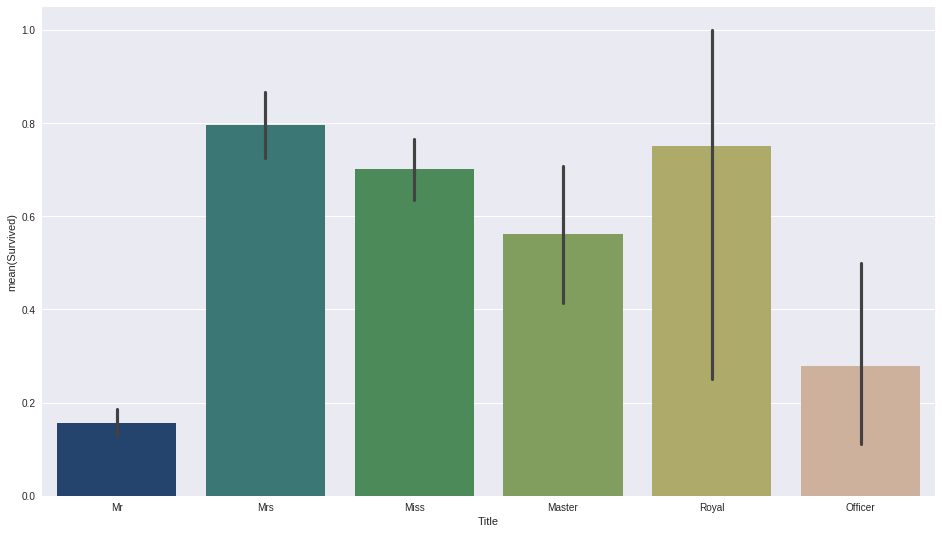

In [0]:
data["Title"]=data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
#각 승객의 이름별로 ,자른후 자른 나머지값에서 [1] ,로 다시 자른후 Title에 대입


data["Title"]=data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
#각 승객의 이름별로 ,자른후 자른 나머지값에서 [1] ,로 다시 자른후 Title에 대입

Title_Dict = {}
# 각 Title의 값을 6개로 분류하기위해 딕셔너리 생성

Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royal'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
# 6개로 분류하기위해 작업

data['Title'] = data['Title'].map(Title_Dict)
# Title을 6개로 분류하기위해 맵핑


sns.barplot(x='Title',y='Survived',data=data)

** 추론 할 수 있는 결론 : Mrs , Miss , Royal 에서 높은 생존확률을 보이고 있다. **

### Family 피쳐 생성

본인 + 형제자매(SilSp) + 부모자녀(Parch)을 더해 생성

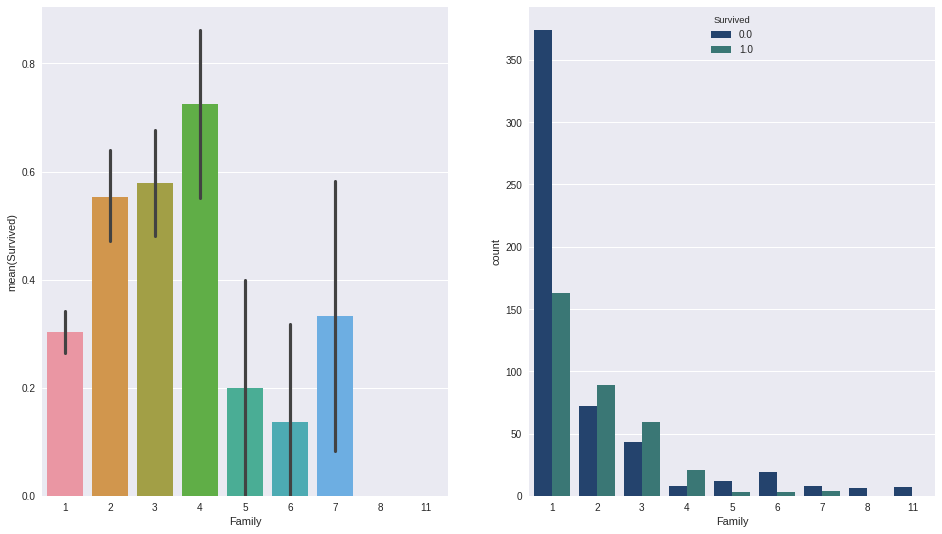

In [0]:
data['Family']=data['SibSp']+data['Parch']+1
# Family라는 피쳐를 만들고 형제,자매 + 부모,자녀 + 자신을 더해 값을 대입합니다.

f,ax=plt.subplots(1,2)
#파레트 생성

sns.barplot(x="Family", y="Survived", data=data ,ax=ax[0])
# 가족당 생존확률 그래프 생성
sns.countplot('Family', hue='Survived',data=data,ax=ax[1])


** 추론 할 수 있는 결론: 가족이 없는 승객이 대부분이며, 가족의 수가 4명인 집단이 생존 확률이 높았다. **

#### Family피쳐를 이용해 함수를 가공하여 3개의 집단으로 분류

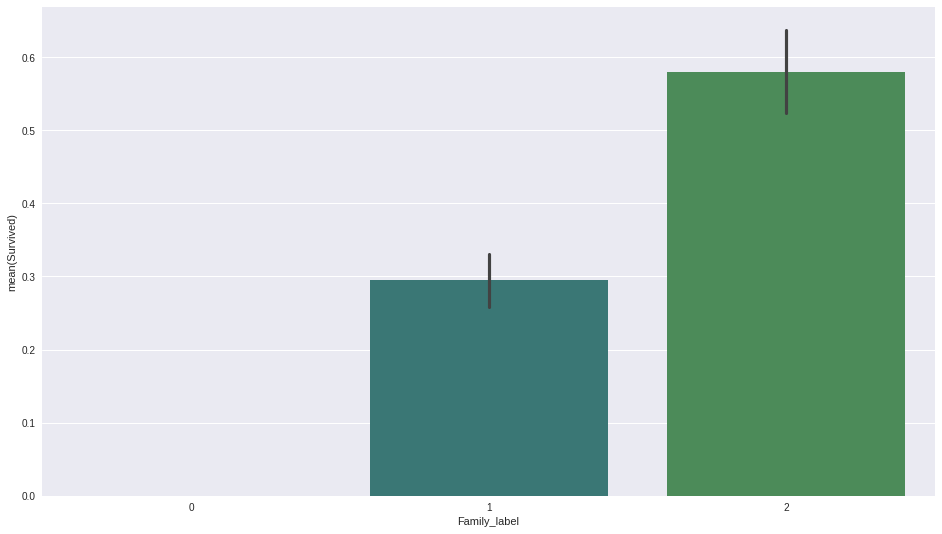

In [0]:
def Family(s):
    if (s >= 2) & (s <= 4):
        return 2
      # 가족의 수가 2 ,3 ,4 일경우 2를 반환
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1 
      # 가족의 수가 5 ,6 ,7 이거나 1명일 경우 1을 반환
    elif (s > 7):
        return 0
      # 가족의 수가 8이상 일경우 0을 반환
      
data['Family_label']=data['Family'].apply(Family)
# 함수를 이용하여 Faimily_label이라는 피쳐를 생성


sns.barplot(x="Family_label", y="Survived", data=data)

** 추론 할 수 있는 결론 : 2에 있는 집단이 생존확률이 높았다. **

### Cabin_label 생성

cabin의 값이 많이 비어 있으므로 비어있는 값들을 None으로 채워 준후 앞의 글자를 활용해 Cabin_label 생성


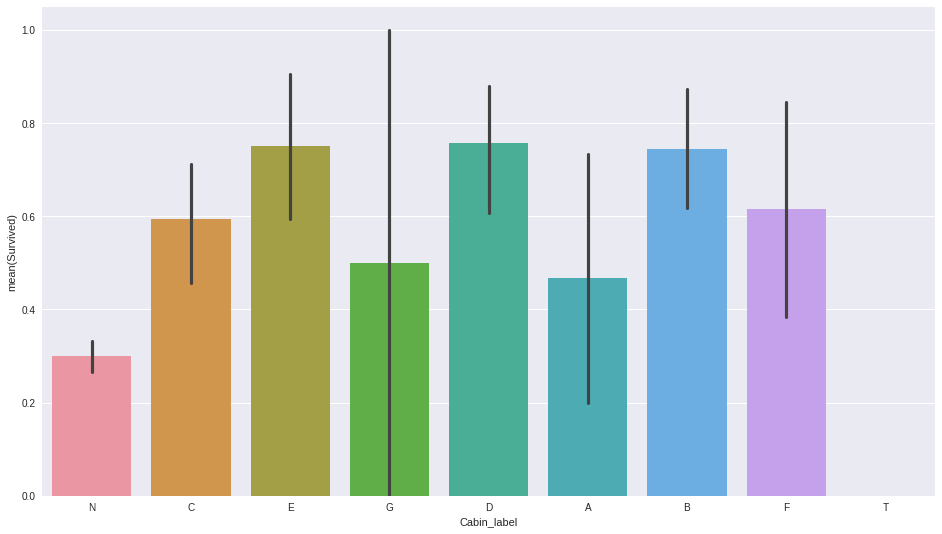

In [0]:
data['Cabin'] = data['Cabin'].fillna('None')
# 객실번호 비어있는 값을None으로 채워줌

data['Cabin_label']= data['Cabin'].str.get(0)
# 객실번호 앞글자를 활용하여 피쳐 생성

sns.barplot(x="Cabin_label", y="Survived", data=data)

** 추론 할 수 있는 결론 :  특이한 점이 없는것 같다. **

### Ticket_label 생성

앞서 데이터에서 동일한 티켓 번호를 가진 승객이 있었기 때문에  그 승객들의 숫자를 세어 새로운 피쳐 생성

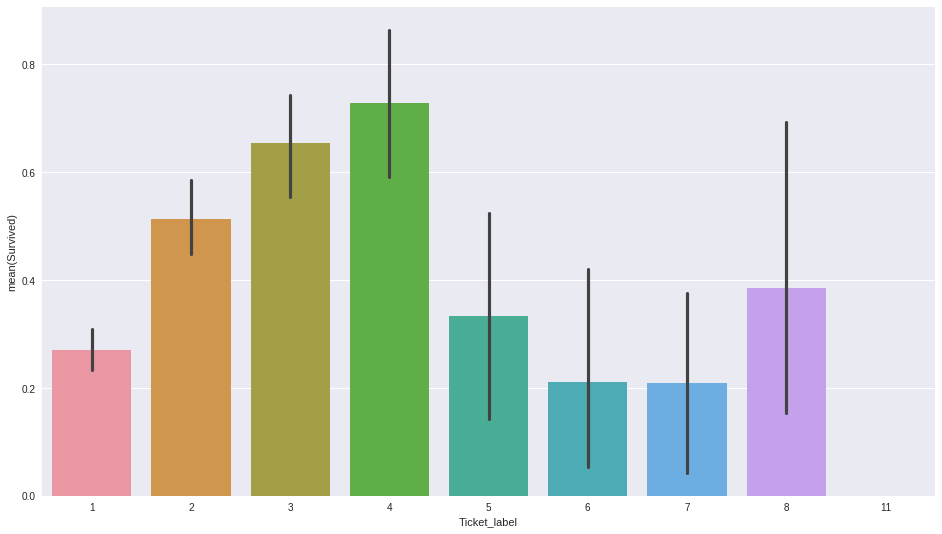

In [0]:
TicketCount = dict(data['Ticket'].value_counts())
# 연습셋에서 동일한 티켓 번호를 가진 승객의 수를 계산

data['Ticket_label'] = data['Ticket'].apply(lambda x:TicketCount[x])
# 승객의 수를 계산한 값으로 피쳐생성

sns.barplot(x='Ticket_label', y='Survived', data=data)


#### 그룹을 3개로 분류한다.

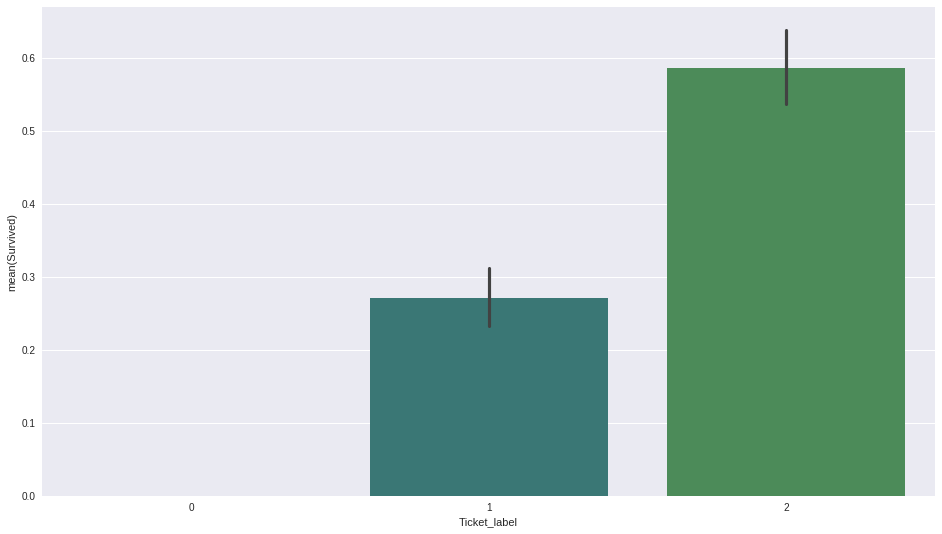

In [0]:
def Ticket_label(s):
    if (s >= 2) & (s <= 4):
        return 2
      # 동일한 티켓을 가지고있는 승객의 수가 2,3,4명이면 2를 반환
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
      # 동일한 티켓을 가지고있는 승객의 수가 1,5,6,7,8명이면 2를 반환
    elif (s > 8):
        return 0
      # 동일한 티켓을 가지고있는 승객의 수가 9명 이상이면 2를 반환

data['Ticket_label'] = data['Ticket_label'].apply(Ticket_label)
#함수를 이용하여 업데이트

sns.barplot(x='Ticket_label', y='Survived', data=data)

** 추론 할 수 있는 결론 : 동일한 티켓을 가지고 있는 승객의  수가 1,5,6,7,8 명이 많다. **

## 비어 있는 값 채우기

### Age 값 채우기

Pclass , Sex , Title 값으로 랜덤포레스트위한 생성

In [0]:
age = data[['Age','Pclass','Sex','Title']]
# 피쳐 추출

age = pd.get_dummies(age)
# 더미데이터 생성

known_age = age[age.Age.notnull()].as_matrix()
# 나이값이 존재하는 사람들을 행렬 형태로 변환

null_age = age[age.Age.isnull()].as_matrix()
# 나이값이 존재하지 않은 사람들을 행렬 형태로 변환

x = known_age[:, 1:]

y = known_age[:, 0]

rf = RandomForestRegressor(n_jobs=-1)

rf.fit(x, y)

predictedAge = rf.predict(null_age[:, 1:])

data.loc[(data.Age.isnull()),'Age'] = predictedAge

### Embarked 값 채우기

In [0]:
data[data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family,Family_label,Cabin_label,Ticket_label
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,1,B,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,1,B,2


**추론 할 수 있는 결론 : Embarked를 가지고 있지 않는 사람들의 공통점은 Pclass=1 이고 Fare=80 이다. **

#### 위에 만들어진 조건을 가지고 비어있는 값 채우기

In [0]:
C = data[(data['Embarked']=='C') & (data['Pclass'] == 1)]['Fare'].median()
print(C)
# 탑승한곳이 C이면서 1등석인 Fare의 중간값

S = data[(data['Embarked']=='S') & (data['Pclass'] == 1)]['Fare'].median()
print(S)
# 탑승한곳이 S이면서 1등석인 Fare의 중간값

Q = data[(data['Embarked']=='Q') & (data['Pclass'] == 1)]['Fare'].median()
print(Q)
# 탑승한곳이 Q이면서 1등석인 Fare의 중간값

data['Embarked'] = data['Embarked'].fillna('C')


76.7292
52.0
90.0


### Fare 값 채우기

In [0]:
data[data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family,Family_label,Cabin_label,Ticket_label
1043,60.5,None,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,1,1,N,1


In [0]:
fare=data[(data['Embarked'] == "S") & (data['Pclass'] == 3)].Fare.median()
# 탑승한 곳이 S이면서 3등석인 Fare의 중간값 추출

data['Fare']=data['Fare'].fillna(fare)
# 값 채우기

### Last_name 생성

In [0]:
data['Last_name']=data['Name'].apply(lambda x:x.split(',')[0].strip())
# 승객 이름의 성을 추출하여 새로운 피쳐 생성

Lastname_Count = dict(data['Last_name'].value_counts())
# 같은 성을 가진 사람을 추출하려는 변수 생성

data['Family_Group'] = data['Last_name'].apply(lambda x:Lastname_Count[x])
# Family_Group을 생성함.

Female_Child_Group=data.loc[(data['Family_Group']>=2) & ((data['Age']<=12) | (data['Sex']=='female'))]
# 두명 이상의 가족중에서 여자 또는 12살 이하의 아동을 검색

Male_Adult_Group=data.loc[(data['Family_Group']>=2) & (data['Age']>12) & (data['Sex']=='male')]
# 두명 이상의 가족중에서 남자 이면서 13살 이상인 사람을 검색


In [0]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Last_name')['Survived'].mean().value_counts())
Female_Child.columns=['Lastname_Count']
Female_Child

,Lastname_Count
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


** 추론 할 수 있는 결론 : 여성과 아이 그룹에서 평균 생존율은 대부분 1 또는 0이다. 즉, 모두 생존했거나 모두 죽었다는것을 의미함. **

In [0]:
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Last_name')['Survived'].mean().value_counts())
Male_Adult.columns=['Lastname_Count']
Male_Adult

,Lastname_Count
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


** 추론 할 수 있는 결론 : 남성 그룹의 평균 생존율은 0또는 1이며 많이 죽었다는것을 알 수 있다. **

### 지금 까지의 결론들을 통해 가설을 세울수 있는 그룹을 생성

In [0]:
Female_Child_Group=Female_Child_Group.groupby('Last_name')['Survived'].mean()
#여성과 어린이 집단의 평균값 추출

Dead_list=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
# 죽은 리스트에 여성과 어린이 집단의 평균값중 0인 인덱스 값 반환
print(Dead_list)

Male_Adult_List=Male_Adult_Group.groupby('Last_name')['Survived'].mean()
#남성과 성인 집단의 평균값 추출
Survived_list=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
# 생존 리스트에서 남성과 성인 집단의 평균값중 1인 인덱스 값 반환
print(Survived_list)

{'Boulos', 'Goodwin', 'Palsson', 'Canavan', 'Attalah', 'Panula', 'Oreskovic', 'Bourke', 'Johnston', 'Sage', 'Cacic', 'Caram', 'Rosblom', 'Arnold-Franchi', 'Robins', 'Ilmakangas', 'Strom', 'Barbara', 'Olsson', 'Skoog', 'Vander Planke', 'Zabour', 'Rice', 'Lahtinen', 'Lobb', 'Ford', 'Jussila', 'Van Impe', 'Turpin', 'Lefebre', 'Danbom'}
{'Cardeza', 'Daly', 'Greenfield', 'Frauenthal', 'Harder', 'Duff Gordon', 'Dick', 'Beane', 'Bishop', 'Goldenberg', 'Jussila', 'Frolicher-Stehli', 'Jonsson', 'McCoy', 'Chambers', 'Taylor', 'Beckwith', 'Nakid', 'Bradley', 'Kimball'}


In [0]:
train1=data.loc[data['Survived'].notnull()]
# 데이터셋 안에 Survived값이 빈값이 아닌 변수 생성

test1=data.loc[data['Survived'].isnull()]
# 데이터셋 안에 Survived값이 빈값인 변수 생성

test1.loc[(test1['Last_name'].apply(lambda x:x in Dead_list)),'Sex'] = 'male'
#  

test1.loc[(test1['Last_name'].apply(lambda x:x in Dead_list)),'Age'] = 60


test1.loc[(test1['Last_name'].apply(lambda x:x in Dead_list)),'Title'] = 'Mr'


test1.loc[(test1['Last_name'].apply(lambda x:x in Survived_list)),'Sex'] = 'female'


test1.loc[(test1['Last_name'].apply(lambda x:x in Survived_list)),'Age'] = 5


test1.loc[(test1['Last_name'].apply(lambda x:x in Survived_list)),'Title'] = 'Miss'


### 데이터 선택 및 숫자값으로 전송

In [0]:
data=pd.concat([train1,test1])

data=data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','Family_label','Cabin_label','Ticket_label']]

data=pd.get_dummies(data)
trainset=data[data['Survived'].notnull()]
testset=data[data['Survived'].isnull()].drop('Survived',axis=1)
X = trainset.as_matrix()[:,1:]
Y = trainset.as_matrix()[:,0]

## 모델 학습 및 예측
 그리드 검색을 사용하여 랜덤 포레스트의 최상의 매개변수를 찾음.

In [0]:
pipe=Pipeline([('select',SelectKBest(k=20)), 
               ('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])

param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='accuracy', cv=10)
gsearch.fit(X,Y)
print(gsearch.best_params_, gsearch.best_score_)

{'classify__max_depth': 6, 'classify__n_estimators': 22} 0.8451178451178452


In [55]:
select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 22,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, Y)

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=20, score_func=<function f_classif at 0x7f3afe989488>)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0....imators=22, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=True))])

In [56]:
score = model_selection.cross_val_score(pipeline, X, Y, cv= 10)
print("Score : Mean - %.7g | Std - %.7g " % (np.mean(score), np.std(score)))

Score : Mean - 0.8451274 | Std - 0.02736289 


## 만들어진 파일 제출

In [0]:
PassengerId = test['PassengerId']
# 제출에 사용된 테스트셋에 승객id입력
predictions = pipeline.predict(testset)
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv("submission.csv", index=False)